# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exploratory Data Analysis - Homework

The aim of this notebook is to give you an exercise to perform an exploratory data analysis in order to extract some useful information hidden in data.

We are going to analyse the [Tennis dataset](http://tennis-data.co.uk). In order to guide your analysis, you should try to approach the problem by wondering some questions. The role of the analysis is to find the answers.

In [1]:
# Import Libraries
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

import matplotlib.pyplot as plt
import seaborn as sns


# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Problem description

### The data
The website​ [​http://tennis-data.co.uk/alldata.php​](​http://tennis-data.co.uk/alldata.php​) gathers outcomes of both WTA​ (Women Tennis Association)​ and ATP ​(Association of Tennis Professionals - men only)​ tennis games over several years.
A short description of each variable can be found here : [http://www.tennis-data.co.uk/notes.txt](http://www.tennis-data.co.uk/notes.txt)

### What is expected from you
First of all, answer the following questions.

#### Questions
Please answer the following questions about the dataset with the appropriate line(s) of code.

##### Example

__Question​__: How many ATP matches are there in the dataset? 

__Answer​__: 
```python
len(df_atp)
```

1. Who are the three ATP players with the most wins ?
2. How many sets did the player “​Federer R.” win in total ?
3. How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?
4. For each match, what is the percentage of victories of the winner in the past ?
5. How are (differently) distributed wins of players in the age segments `[16-23]`, `[24-30]` `[30+]`?
6. Does the behaviour in the previous answer changes between men and women?

_Hint_: Careful with null values and how you handle them.

#### Bonus points

* your notebook contains graphics that are both interesting and pretty
* we can go through your entire notebook without frowning
* you teach us something cool 🙂

#### Free Analysis

We would like you to perform some free analysis. For example study distributions, correlations, etc.

---

## Your Work

Have fun!

## My work (Solutions)

First of all we try to figure out the content of the dataset.

In [7]:
df_atp.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_wta.head()

,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Sun T.T.,...,1.35,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Dulko G.,...,3.75,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Loit E.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Craybas J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Auckland,ASB Classic,2007-01-01,Tier 4,Outdoor,Hard,1st Round,3,Bartoli M.,...,1.20,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         52298 non-null  int64         
 1   Location    52298 non-null  object        
 2   Tournament  52298 non-null  object        
 3   Date        52298 non-null  datetime64[ns]
 4   Series      52298 non-null  object        
 5   Court       52298 non-null  object        
 6   Surface     52298 non-null  object        
 7   Round       52298 non-null  object        
 8   Best of     52298 non-null  int64         
 9   Winner      52298 non-null  object        
 10  Loser       52298 non-null  object        
 11  WRank       52283 non-null  object        
 12  LRank       52220 non-null  object        
 13  W1          52035 non-null  float64       
 14  L1          52037 non-null  float64       
 15  W2          51526 non-null  object        
 16  L2          51527 non-

One can notice a duplication of some rows: indeed for instance R. Federer has been registered with a space after the "R.", thus let's first verify other players have the same issue, and then unificate these versions of the same player.

In [10]:
df_atp['Winner'] = df_atp.Winner.map(lambda x: x[:-1] if x[-1] == ' ' else x) # for Winners 
df_atp['Loser'] = df_atp.Loser.map(lambda x: x[:-1] if x[-1] == ' ' else x) # for Losers 

A further cleaning operation is needed due to a typo in `Lsets` comlumn.
I also convert the whole column to float.

In [11]:
df_atp[df_atp['Lsets'] == '`1']

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
18827,31,Paris,French Open,2006-06-11,Grand Slam,Outdoor,Clay,The Final,5,Nadal R.,...,1.67,2.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_atp['Lsets'] = df_atp['Lsets'].map(lambda x: 1 if x=='`1' else float(x))

### Questions

We are now ready to answer questions hopefully in a smart way.

#### 1. Who are the three ATP players with the most wins ?

In order to find this answer, one possible way is to group the dataframe by winner name, counting in how many rows they appear as winners.

Hence, we sort by one column always valorised in the dataframe. This can be the ATP one, as on can see in the `df_atp.info()` output.

In [13]:
df_atp_winner = df_atp.groupby('Winner').agg({'ATP':'count', 'Wsets': 'sum'})

In [14]:
df_atp_winner.sort_values('ATP', ascending=False).head(3)

,ATP,Wsets
Winner,,
Federer R.,1125,2554.0
Nadal R.,891,1989.0
Djokovic N.,807,1821.0


The answer then is 

> __Answer__: The three ATP players with the most wins are (not surprisingly) _Roger Federer_, _Rafael Nadal_ and _Novak Djokovic_.

### Bonus: winning ratio

One other information one can extract from data is who are the three ATP players with the highest win rate with respect to the number of played matches.

To get this additional piece of information, we can sum the number of victories with the number of loss and calculate the ratio 

$$ \frac{\#\ \mathrm{victories}}{\#\ \mathrm{matches}}$$

We have seen the only column we need is the ATP one, so we will rename this column in the following.

In [15]:
df_atp_loser = df_atp.groupby('Loser').agg({'ATP':'count', 'Lsets': 'sum'})

In [16]:
df_atp_matches = (pd.concat([df_atp_winner.rename(columns={'ATP': 'n_win'}), 
                            df_atp_loser.rename(columns={'ATP': 'n_lose'})], axis = 1, sort=True))[['n_win', 'n_lose']]
df_atp_matches.head().fillna(0)

,n_win,n_lose
Hajek J.,1.0,1
Abdulla M.,0.0,1
Abel M.,2.0,7
Acasuso J.,181.0,178
Adaktusson J.,0.0,1


In [17]:
df_atp_matches['winning_ratio'] = df_atp_matches['n_win']/(df_atp_matches['n_win']+df_atp_matches['n_lose']) 

In [18]:
df_atp_matches.sort_values('winning_ratio', ascending=False).head(3)

,n_win,n_lose,winning_ratio
Djokovic N.,807.0,165,0.830247
Federer R.,1125.0,233,0.828424
Nadal R.,891.0,189,0.825000


The best three for number of victories are still there, however the order is slightly changed, having Djokovic in the first place for victory ratio.

#### 2. How many sets did the player “Federer R.” win in total ?

We are looking at the total value of winning set of Roger Federer.
Information is stored in two columns: `Wsets` (the number of set won in winning matches) and `Lsets` (the number of set he won in a match eventually lost).

The strategy is quite simple: 
1. We count the number of set won in won matches by a `groupby`and a sum over won sets.
2. We do the same for lost sets
3. Sum the two numbers

In [19]:
Wsets_fed = df_atp_winner.loc['Federer R.']['Wsets']
Lsets_fed = df_atp_loser.loc['Federer R.']['Lsets']

print(f'Roger Federer won in total {Wsets_fed + Lsets_fed} sets.')

Roger Federer won in total 2705.0 sets.


Hence, the answer is 

> __Answer__: _Roger Federer_ won in total 2705 sets

#### 3. How many sets did the player “​Federer R.” win during the years 2016 and 2017 ?

This is a subset of the previous answer. Thus we filter the dataframe by the date interval $(2016,2017)$.
The Date column is already in a datetime format.

In [20]:
df_atp_1617 = df_atp[(df_atp.Date>='2016-01-01') & (df_atp.Date <='2017-12-01')]

In [21]:
df_wsets_1617 = df_atp_1617.groupby('Winner').sum()[['Wsets']]
df_lsets_1617 = df_atp_1617.groupby('Loser').sum()[['Lsets']]

In [22]:
Wsets_fed_1617 = df_wsets_1617.loc['Federer R.'][0]
Lsets_fed_1617 = df_lsets_1617.loc['Federer R.'][0]

print('Roger Federer won %i sets between 2016 and 2017' %(Wsets_fed_1617 + Lsets_fed_1617))

Roger Federer won 182 sets between 2016 and 2017


Then, the answer is 

> __Answer__: _Roger Federer_ won 182 sets in the period between 2016 and 2017.

#### 4. For each match, what is the percentage of victories of the winner in the past ?

To answer to this question we first define a function.

In [23]:
def add_winning_ratio(df, col_name = 'Wrate'):
    """
        (df, [str]) -> NoneType
        
    updates the dataframe with an extra column, called as the :col_name: argument,
    containing the percentage of victories of the winner before that match.
    No return instruction, since it updates the df only.
    
    df has to contain columns 'Winner' and 'Loser' indicating players playing that match.
    """
    try:
        winner_list = list(df.Winner)
        loser_list = list(df.Loser)
    except AttributeError:
        raise ValueError('Your dataframe does not contains the right columns')

    ratios = []

    for match, winner in enumerate(winner_list):
        n_win = winner_list[:match].count(winner)
        n_lose = loser_list[:match].count(winner)
        try:
            winning_ratio = (n_win)/(n_win+n_lose)
        except ZeroDivisionError:
            winning_ratio = 'NotDefined'
        ratios.append(winning_ratio)
    
    df[col_name] = ratios

Hence the for loop on each match to get the percentage of victories in the past. Of course there will be some non-defined value.

In [ ]:
add_winning_ratio(df_atp)

To visualise the answer, let's reduce the showed columns.

In [ ]:
df_atp[['Date', 'Winner', 'Wrate']]

,Date,Winner,Wrate
0,2000-01-03,Dosedel S.,NotDefined
1,2000-01-03,Enqvist T.,NotDefined
2,2000-01-03,Escude N.,NotDefined
3,2000-01-03,Federer R.,NotDefined
4,2000-01-03,Fromberg R.,NotDefined
5,2000-01-03,Gambill J.M.,NotDefined
6,2000-01-03,Grosjean S.,NotDefined
7,2000-01-03,Henman T.,NotDefined
8,2000-01-03,Hewitt L.,NotDefined
9,2000-01-03,Lisnard J.,NotDefined


The answer is in the column `Wrate`.

An alternative solution (slightly more computationally efficient) could be the following cell, making use of `cumcount` method of pandas GroupBy dataframes.

In [24]:
players_cumulative_wins = df_atp.groupby('Winner').cumcount() + 1
players_cumulative_defeats = df_atp.groupby('Loser').cumcount() + 1
df_atp['WinnerCumWins'] = players_cumulative_wins
df_atp['LoserCumDefeats'] = players_cumulative_defeats
colStack = df_atp[['Winner', 'Loser']].stack()
colStack = colStack.groupby(colStack).cumcount().add(1).unstack()
colStack.columns = ['WinnerNbGames', 'LoserNbGames']
df_atp['WinnerNbGames'] = colStack['WinnerNbGames']
df_atp['LoserNbGames'] = colStack['LoserNbGames']
df_atp['WinnerPerc'] = df_atp['WinnerCumWins']/df_atp['WinnerNbGames']
df_atp['LoserPerc'] = 1 - df_atp['LoserCumDefeats']/df_atp['LoserNbGames']
print(df_atp[['Winner', 'Loser', 'WinnerPerc', 'LoserPerc']].tail(100))
df_atp = df_atp.drop(['WinnerCumWins', 'LoserCumDefeats', 'WinnerNbGames', 'LoserNbGames'], axis = 1)

            Winner             Loser  WinnerPerc  LoserPerc
52198     Copil M.          Fritz T.    0.393939   0.485714
52199    Zverev A.  Bautista Agut R.    0.668016   0.654088
52200   Federer R.          Simon G.    0.829377   0.585205
52201  Medvedev D.      Tsitsipas S.    0.577586   0.555556
52202     Copil M.         Zverev A.    0.400000   0.665323
...            ...               ...         ...        ...
52293    Zverev A.          Isner J.    0.665354   0.621262
52294  Djokovic N.          Cilic M.    0.830928   0.651163
52295    Zverev A.        Federer R.    0.666667   0.828424
52296  Djokovic N.       Anderson K.    0.831102   0.588679
52297    Zverev A.       Djokovic N.    0.667969   0.830247

[100 rows x 4 columns]


#### 5. How are (differently) distributed wins of players in the age segments `[16-23]`, `[24-30]` `[30+]`?

This is the first question where you have to make an "educated guess".

Indeed, there is no information about player age in the dataset.

The first action one can take is to head on the internet and look for any single player age ad insert such information in the dataset. 
However, this is not convenient because of the form of the data we have, futhermore a lot of manual action is required and remember _lazyness should always be your engine_.

An alternative solution is looking for the average age at the first match and then estimate the age of each player from that. 
We are going to follow this path.

_From an accurate google search, one can find that the average age of players at their first match in the ATP tournaments is ~$19.5$ years old_.

Hence, first of all we need to calcualte the estimated age of players for each match.

In [25]:
# Dictionary collecting the debut date for each player
debut_dates = {}
for player in df_atp.Winner.unique():
    debut_dates[player] = df_atp.loc[min((df_atp.Loser.values ==  player).argmax(), (df_atp.Winner.values == player).argmax())].Date

In [26]:
df_debut_dates = pd.DataFrame(debut_dates.items(), columns=['Player', "W_debut_date"])
df_debut_dates

,Player,W_debut_date
0,Dosedel S.,2000-01-03
1,Enqvist T.,2000-01-03
2,Escude N.,2000-01-03
3,Federer R.,2000-01-03
4,Fromberg R.,2000-01-03
...,...,...
911,Watanuki Y.,2018-07-31
912,Wu Y.,2017-09-25
913,Caruso S.,2016-05-09
914,Otte O.,2018-05-27


We can add such information to the dataframe.

In [27]:
df_atp = pd.merge(left = df_atp, right=df_debut_dates, left_on="Winner", right_on="Player").drop("Player", axis=1)

In [28]:
df_atp

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,WinnerPerc,LoserPerc,W_debut_date
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,2000-01-03
1,5,Sydney,Sydney International,2000-01-10,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.000000,2000-01-03
2,5,Sydney,Sydney International,2000-01-10,International,Outdoor,Hard,2nd Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.333333,2000-01-03
3,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.000000,2000-01-03
4,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,2nd Round,5,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,0.500000,2000-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52293,59,Tokyo,Rakuten Japan Open Tennis Championships,2018-10-01,ATP500,Outdoor,Hard,1st Round,3,Watanuki Y.,...,1.53,NaN,NaN,2.80,1.61,2.52,1.53,0.500000,0.453237,2018-07-31
52294,60,Shanghai,Shanghai Masters,2018-10-08,Masters 1000,Outdoor,Hard,1st Round,3,Wu Y.,...,2.75,NaN,NaN,1.50,3.00,1.46,2.74,0.166667,0.000000,2017-09-25
52295,61,Antwerp,European Open,2018-10-17,ATP250,Indoor,Hard,1st Round,3,Caruso S.,...,2.66,NaN,NaN,1.58,3.10,1.45,2.77,0.200000,0.361111,2016-05-09
52296,63,Stockholm,Stockholm Open,2018-10-17,ATP250,Indoor,Hard,1st Round,3,Otte O.,...,1.92,NaN,NaN,2.05,2.02,1.88,1.94,0.500000,0.340426,2018-05-27


Now, we need to calculate the age range in which the player falls when plays a match.

In [30]:
df_atp['age_range'] = (df_atp.Date - df_atp.W_debut_date).apply(lambda x: 1 if x.days < 953 else (2 if x.days < 2500 else 3))
df_atp


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,SJW,SJL,MaxW,MaxL,AvgW,AvgL,WinnerPerc,LoserPerc,W_debut_date,age_range
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,2000-01-03,1
1,5,Sydney,Sydney International,2000-01-10,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.000000,2000-01-03,1
2,5,Sydney,Sydney International,2000-01-10,International,Outdoor,Hard,2nd Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.333333,2000-01-03,1
3,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,1st Round,5,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.000000,2000-01-03,1
4,6,Melbourne,Australian Open,2000-01-17,Grand Slam,Outdoor,Hard,2nd Round,5,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,0.500000,2000-01-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52293,59,Tokyo,Rakuten Japan Open Tennis Championships,2018-10-01,ATP500,Outdoor,Hard,1st Round,3,Watanuki Y.,...,NaN,NaN,2.80,1.61,2.52,1.53,0.500000,0.453237,2018-07-31,1
52294,60,Shanghai,Shanghai Masters,2018-10-08,Masters 1000,Outdoor,Hard,1st Round,3,Wu Y.,...,NaN,NaN,1.50,3.00,1.46,2.74,0.166667,0.000000,2017-09-25,1
52295,61,Antwerp,European Open,2018-10-17,ATP250,Indoor,Hard,1st Round,3,Caruso S.,...,NaN,NaN,1.58,3.10,1.45,2.77,0.200000,0.361111,2016-05-09,1
52296,63,Stockholm,Stockholm Open,2018-10-17,ATP250,Indoor,Hard,1st Round,3,Otte O.,...,NaN,NaN,2.05,2.02,1.88,1.94,0.500000,0.340426,2018-05-27,1


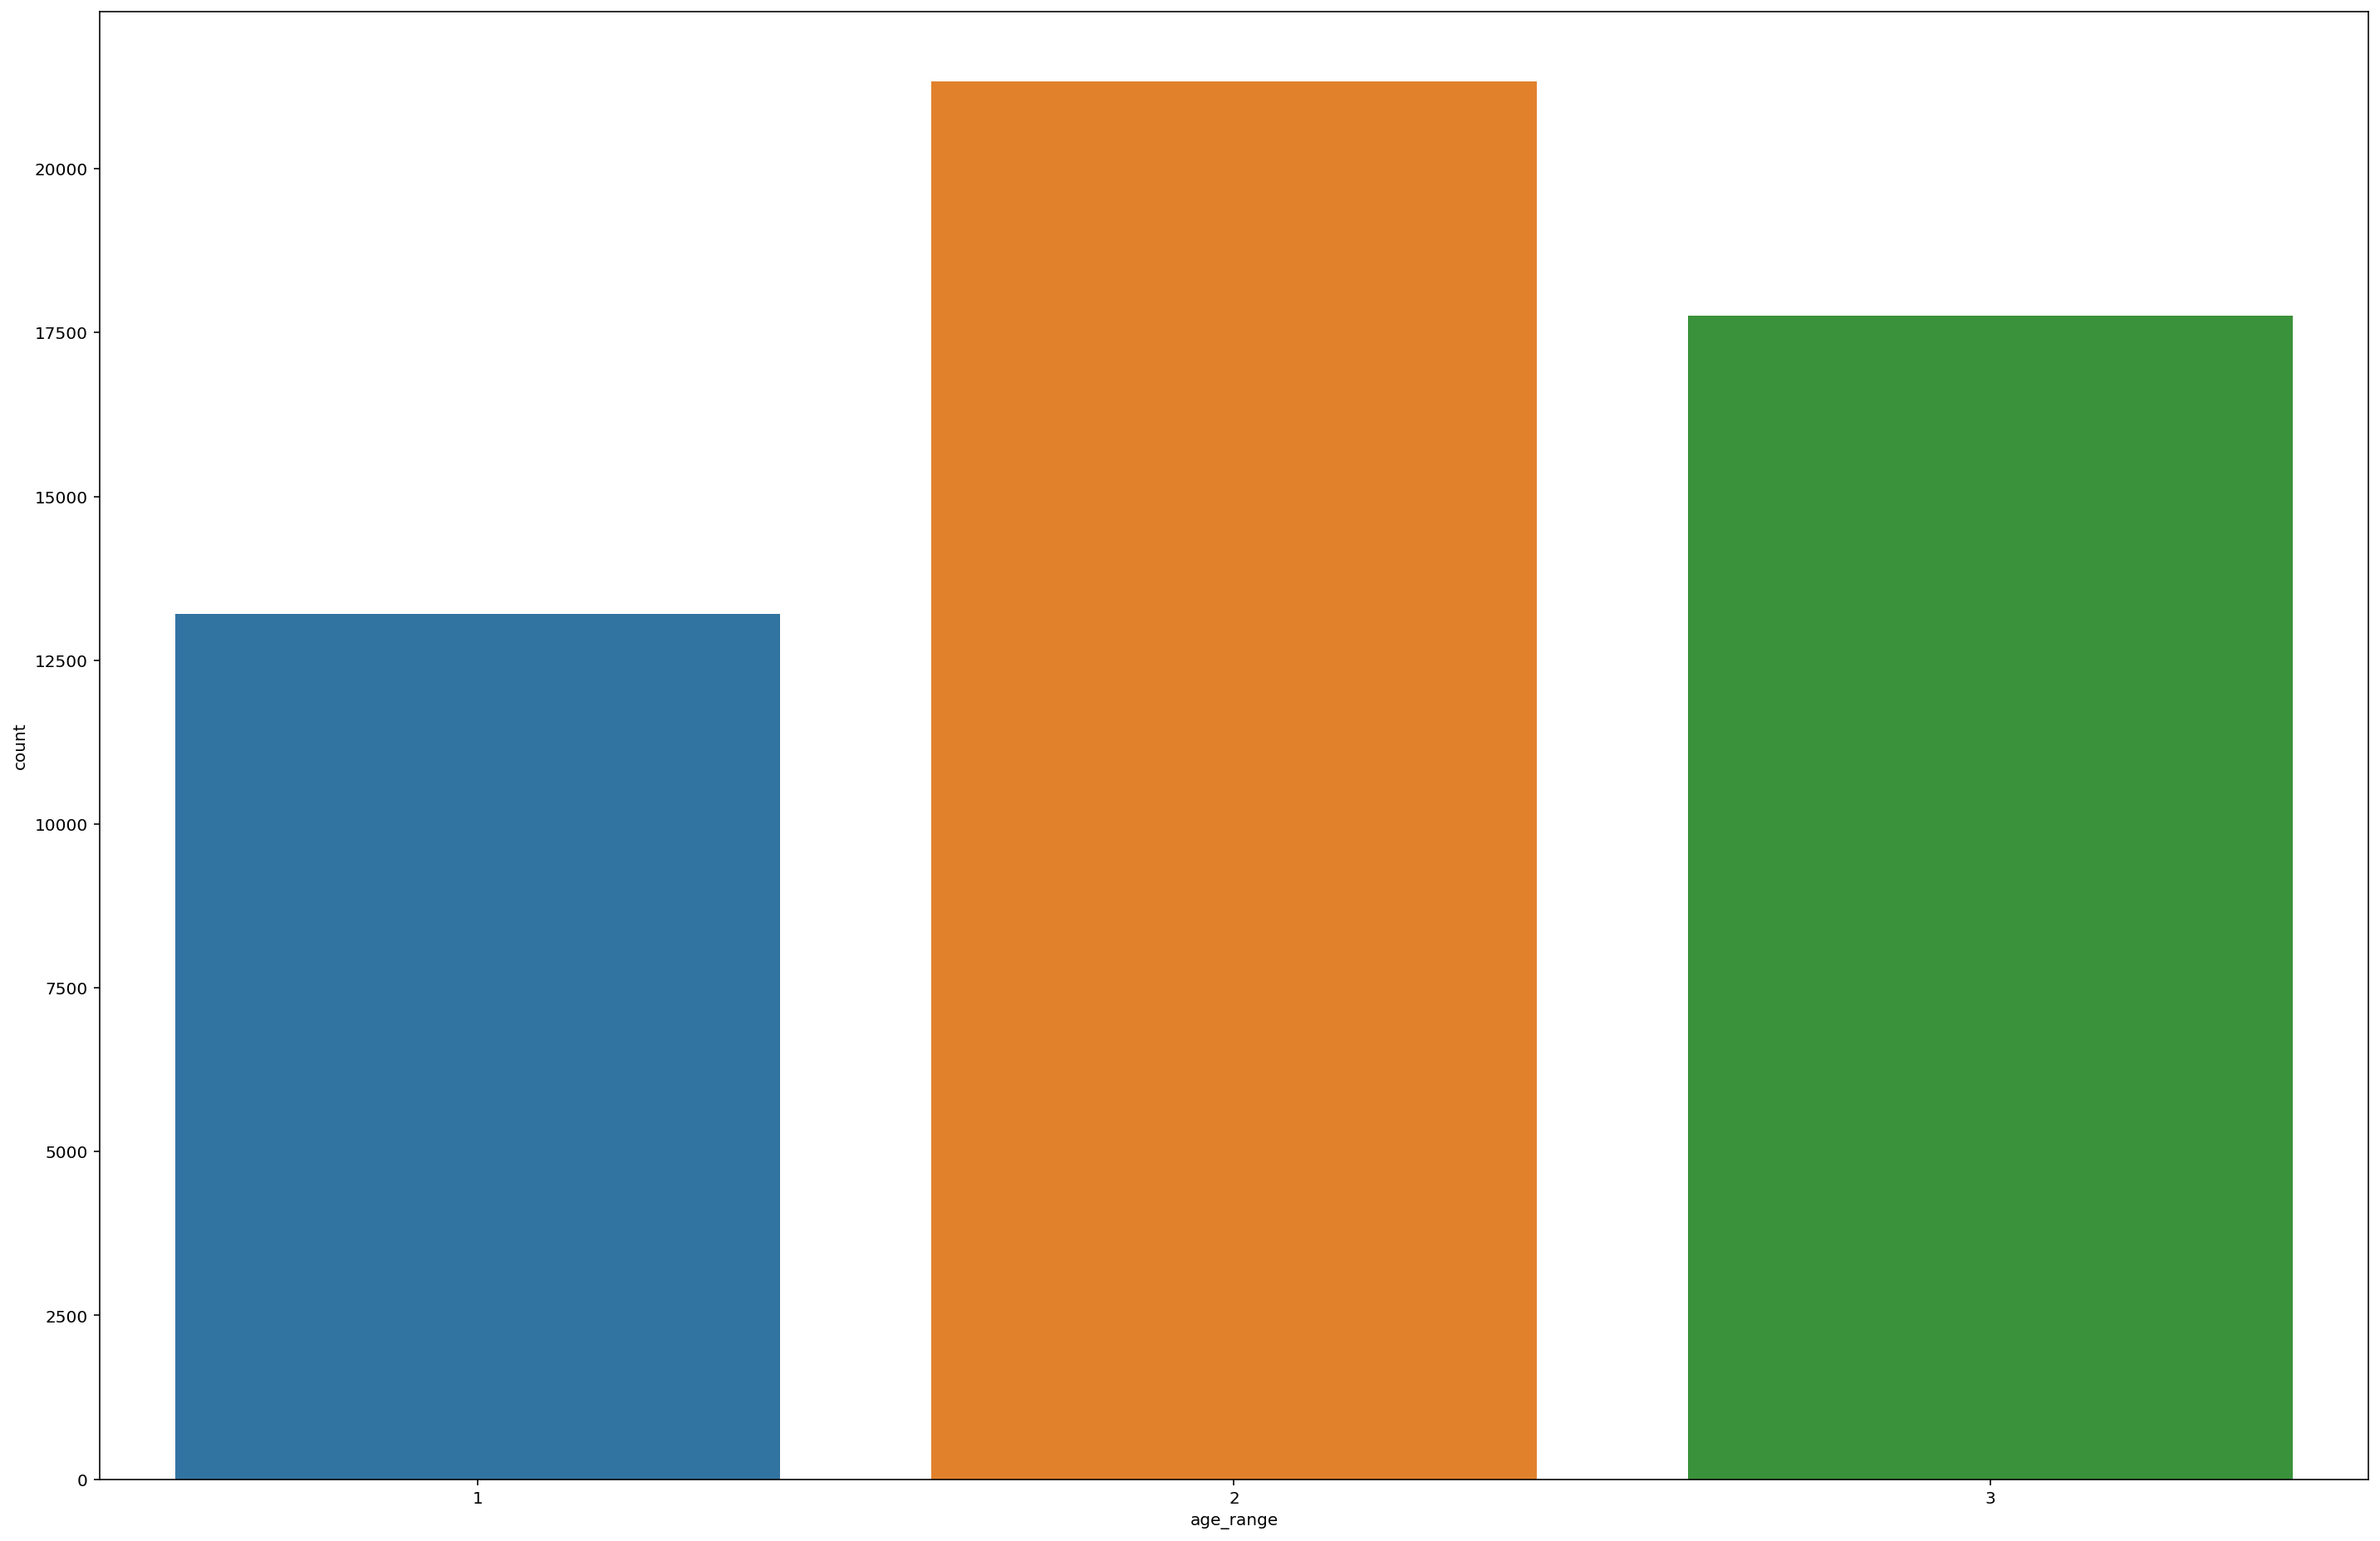

In [31]:
plt.figure(figsize=(20,13))
sns.countplot(x = "age_range", data = df_atp)
plt.tight_layout()
plt.show()

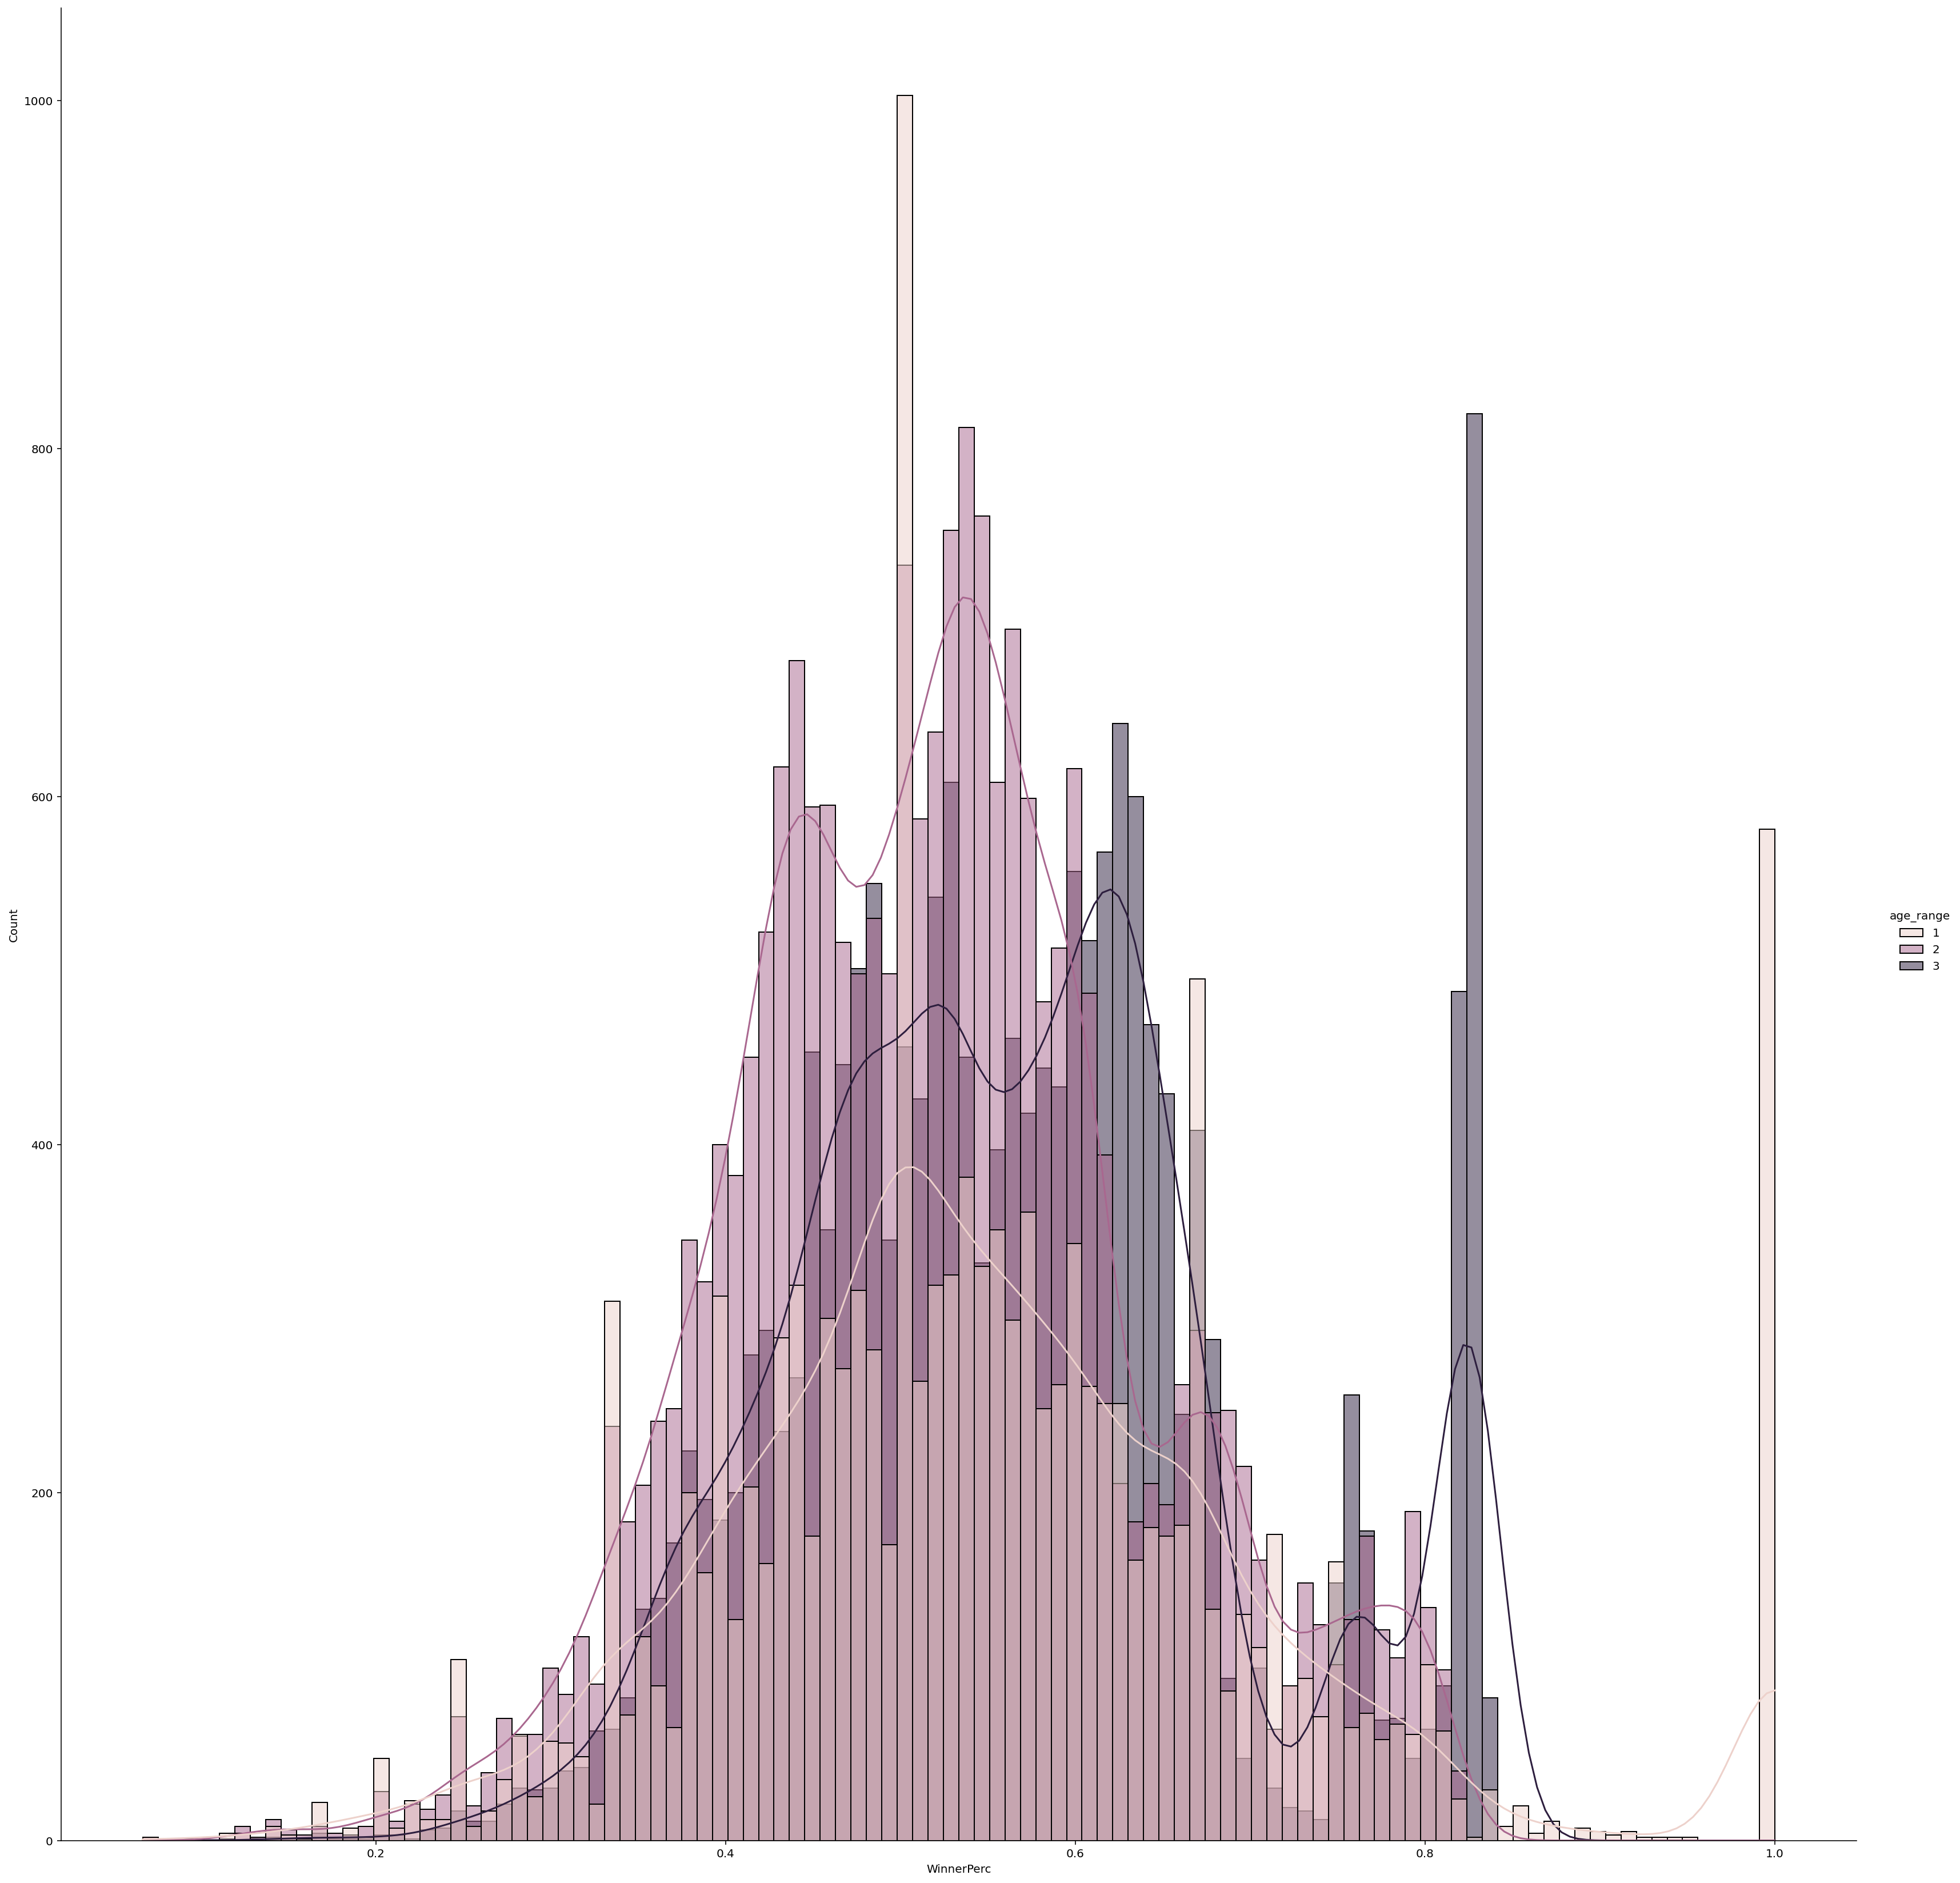

In [32]:
# example: Winner percentage distribution
sns.displot(
    data=df_atp, kind="hist", kde=True,
    x="WinnerPerc", hue="age_range",  height=23);